In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

In [2]:
### Homework 1

In [3]:
data = {
    'Age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'senior',
             'middle_aged', 'youth', 'youth', 'senior', 'youth', 'middle_aged', 'middle_aged', 'senior'],
    'Income': ['High', 'High', 'High', 'medium', 'Low', 'Low',
               'Low', 'medium', 'Low', 'medium', 'medium', 'medium', 'High', 'medium'],
    'Student': ['no', 'no', 'no', 'No', 'yes', 'yes',
                'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'Credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent',
                      'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'Buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no',
                      'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)
df

,Age,Income,Student,Credit_rating,Buys_computer
0,youth,High,no,fair,no
1,youth,High,no,excellent,no
2,middle_aged,High,no,fair,yes
3,senior,medium,No,fair,yes
4,senior,Low,yes,fair,yes
5,senior,Low,yes,excellent,no
6,middle_aged,Low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,Low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [4]:
for col in df.columns:
    df[col] = df[col].astype('category').cat.codes
    
X = df.drop('Buys_computer', axis=1)
y = df['Buys_computer']

In [5]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
feature_names = ['Age', 'Income', 'Student', 'Credit_rating']
tree_rules = export_text(model, feature_names=feature_names)
print(tree_rules)

|--- Age <= 0.50
|   |--- class: 1
|--- Age >  0.50
|   |--- Student <= 1.50
|   |   |--- Student <= 0.50
|   |   |   |--- class: 1
|   |   |--- Student >  0.50
|   |   |   |--- class: 0
|   |--- Student >  1.50
|   |   |--- Credit_rating <= 0.50
|   |   |   |--- Age <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Credit_rating >  0.50
|   |   |   |--- class: 1



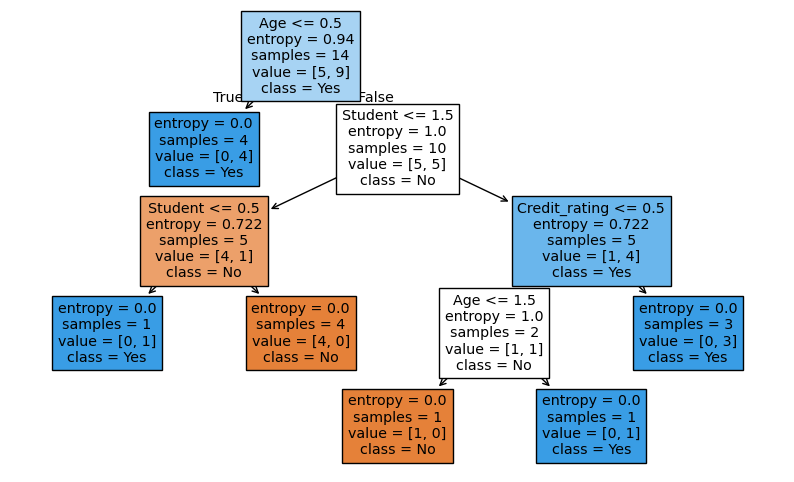

In [7]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.show()

### Homework 2

In [8]:
data = {
    'Age': ['young', 'young', 'middle', 'senior', 'senior', 'senior',
             'middle', 'young', 'young', 'senior', 'young', 'middle', 'middle', 'senior'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low',
               'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes',
                'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'Credit Rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent',
                      'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'Buy': ['no', 'no', 'yes', 'yes', 'yes', 'no',
            'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)
df

,Age,Income,Student,Credit Rating,Buy
0,young,high,no,fair,no
1,young,high,no,excellent,no
2,middle,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle,low,yes,excellent,yes
7,young,medium,no,fair,no
8,young,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [9]:
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [10]:
X = df.drop('Buy', axis=1)
y = df['Buy']

model = CategoricalNB()
model.fit(X, y)

test = pd.DataFrame([['middle', 'high', 'yes', 'fair']], columns=['Age', 'Income', 'Student', 'Credit Rating'])

In [11]:
for col in test.columns:
    test[col] = encoders[col].transform(test[col])

pred = model.predict(test)[0]
prob = model.predict_proba(test)[0]

print("ผลการทำนาย (0=No, 1=Yes):", pred)
print("P(No)=%.3f, P(Yes)=%.3f" % (prob[0], prob[1]))
print("คำตอบสุดท้าย:", "ควรซื้อ (Yes)" if pred == 1 else "ไม่ควรซื้อ (No)")

ผลการทำนาย (0=No, 1=Yes): 1
P(No)=0.070, P(Yes)=0.930
คำตอบสุดท้าย: ควรซื้อ (Yes)
